In [1]:
import os
import sys

os.environ["SPARK_HOME"]=os.path.join(os.path.expanduser("~"),'spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
os.path.join(os.path.expanduser("~"),'spark-2.0.0-bin-hadoop2.7')
for i in sys.path:
    print i

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i)? (<ipython-input-2-b7c99d3d530a>, line 3)

In [4]:
import pyspark
myConf=pyspark.SparkConf()
# \는 연결의 의미 한줄로 쓰지 않으려는
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [5]:
spark.conf.get('spark.sql.warehouse.dir')

u'file:${system:user.dir}/spark-warehouse'

In [6]:
print spark.version
print spark.conf.get('spark.app.name')
print spark.conf.get('spark.master')
print spark.conf.get('spark.driver.host')

2.0.0
pyspark-shell
local[*]
192.168.0.2


In [7]:
spark

In [8]:
spark.conf.get('spark.sql.warehouse.dir')

u'file:${system:user.dir}/spark-warehouse'

In [9]:
myList=[1,2,3,4,5,6,7]

In [10]:
myList

[1, 2, 3, 4, 5, 6, 7]

In [11]:
spark.sparkContext.parallelize(myList)

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:475

In [12]:
myRdd1 = spark.sparkContext.parallelize(myList)

In [13]:
type(myRdd1)

pyspark.rdd.RDD

In [14]:
myRdd1.collect()

[1, 2, 3, 4, 5, 6, 7]

In [15]:
myRdd1.take(3)

[1, 2, 3]

In [3]:
sys.path

['C:\\Users\\qorgk\\spark-2.0.0-bin-hadoop2.7\\python\\lib\\pyspark.zip',
 'C:\\Users\\qorgk\\spark-2.0.0-bin-hadoop2.7\\python\\lib\\py4j-0.10.1-src.zip',
 'C:\\Users\\qorgk\\code\\spark',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3\\python37.zip',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3\\DLLs',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3\\lib',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3',
 '',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\qorgk\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\qorgk\\.ipython']

# 파일에서 읽기

In [20]:
%%writefile data/ds_spark_wiki.txt
Wikipedia
Apache Spark is an open source cluster computing framework.
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
Apache Spark Apache Spark Apache Spark Apache Spark
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
Originally developed at the University of California, Berkeley's AMPLab,
the Spark codebase was later donated to the Apache Software Foundation,
which has maintained it since.
Spark provides an interface for programming entire clusters with
implicit data parallelism and fault-tolerance.

Overwriting data/ds_spark_wiki.txt


In [16]:
spark.sparkContext.textFile(os.path.join("data","ds_spark_wiki.txt"))

data\ds_spark_wiki.txt MapPartitionsRDD[4] at textFile at NativeMethodAccessorImpl.java:-2

In [17]:
myRdd2=spark.sparkContext.textFile(os.path.join("data","ds_spark_wiki.txt"))

In [23]:
myRdd2.first()

u'Wikipedia'

In [8]:
myDf=spark.read.text(os.path.join("data", "ds_spark_wiki.txt"))
print myDf.first()

IllegalArgumentException: u'java.net.URISyntaxException: Relative path in absolute URI: file:C:/Users/qorgk/code/spark/spark-warehouse'

In [28]:
%%writefile ./data/ds_spark_2cols.csv
35, 2
40, 27
12, 38
15, 31
21, 1
14, 19
46, 1
10, 34
28, 3
48, 1
16, 2
30, 3
32, 2
48, 1
31, 2
22, 1
12, 3
39, 29
19, 37
25, 2

Overwriting ./data/ds_spark_2cols.csv


In [29]:
myRdd4 = spark.sparkContext.textFile(os.path.join("data","ds_spark_2cols.csv"))
myRdd4.take(5) # take로 text를 가져오면 그 타입이 list이다.

[u'35, 2', u'40, 27', u'12, 38', u'15, 31', u'21, 1']

In [30]:
myList=myRdd4.take(5)
print type(myList)

<type 'list'>


- '35,2'로 연결된 리스트를 각각의 요소로 나눠주는 작업
- '35','2'로 
- map이라는 함수가 그 역할을 해줌 람다는 함수 이름이 없고 리턴값이 없다.
- 라인의 분기점을 ,로 한다는 의미

In [31]:
myRdd5 = myRdd4.map(lambda line: line.split(','))
myRdd5.take(5)

[[u'35', u' 2'],
 [u'40', u' 27'],
 [u'12', u' 38'],
 [u'15', u' 31'],
 [u'21', u' 1']]

- flatMap은 2차원 요소를 1차원 요소로 바꿔주는 것

### map()

In [32]:
celsius = [39.2, 36.5, 37.3, 37.8]
def c2f(c):
    f=list()
    for i in c:
        _f=(float(9)/5)*i + 32
        f.append(_f)
    return f

print c2f(celsius)

[102.56, 97.7, 99.14, 100.03999999999999]


In [33]:
#python의 map함수. spark아님
celsius = [39.2, 36.5, 37.3, 37.8]
def c2f(c):
    return (float(9)/5)*c + 32

#for문을 사용하지 않고 각각의 요소에 대해 함수를 적용시키는 함수
f=map(c2f, celsius)
print f

[102.56, 97.7, 99.14, 100.03999999999999]


In [34]:
def f(x):
    return x*2
y=f(1)
print y

2


In [35]:
#lambda 함수는 인자를 받고 return과 함수의 이름이 없다. 즉, 계속 사용하는 경우 사용하지 않는다.
y=lambda x:x*2
print y(1)

2


In [36]:
map(lambda c:(float(9)/5)*c + 32, celsius)

[102.56, 97.7, 99.14, 100.03999999999999]

In [37]:
sentence = "Hello World"
map(lambda x:x.split(),sentence)

[['H'], ['e'], ['l'], ['l'], ['o'], [], ['W'], ['o'], ['r'], ['l'], ['d']]

In [38]:
#결과값이 2차원 데이터 text 처리할 시 2차원 이상의 데이터의 경우 flatMap을 사용한다
sentence = ["Hello World", "Good Morining"]
map(lambda x:x.split(),sentence)

[['Hello', 'World'], ['Good', 'Morining']]

In [41]:
nRdd = spark.sparkContext.parallelize([1, 2, 3, 4])
squared = nRdd.map(lambda x: x * x)
print squared

PythonRDD[19] at RDD at PythonRDD.scala:48


In [42]:
print squared.collect()

[1, 4, 9, 16]


### filter()

In [39]:
fib = [0,1,1,2,3,5,8,13,21,34,55]
result = filter(lambda x: x % 2, fib)
print result

[1, 1, 3, 5, 13, 21, 55]


In [45]:
myRdd_spark=myRdd2.filter(lambda line: "Spark" in line)
print "How many lines having 'Spark': ",myRdd_spark.count()

How many lines having 'Spark':  4


In [46]:
myRdd_unicode = myRdd2.filter(lambda line: u"스파크" in line)
print myRdd_unicode.first()

아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.


#### stopword
- 사용하지 않는 언어, 불용어
- 처리해봤자 의미가 별로 없는 단어 즉, 단어 그 자체로는 의미가 없는 단어들

In [47]:
stopwords = ['is','am','are','the','for','a', 'an', 'at']
myRdd_stop = myRdd2.flatMap(lambda x:x.split()).filter(lambda x: x not in stopwords)


In [48]:
for words in myRdd_stop.collect():
    print words,

Wikipedia Apache Spark open source cluster computing framework. 아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. Apache Spark Apache Spark Apache Spark Apache Spark 아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크 Originally developed University of California, Berkeley's AMPLab, Spark codebase was later donated to Apache Software Foundation, which has maintained it since. Spark provides interface programming entire clusters with implicit data parallelism and fault-tolerance.


### reduce()
- 다른 방식의 더하기
- 앞 두 수를 x,y라고 하면 두수를 더하고 나온 값을 다시 x로 그 뒤의 값을 y로 설정하여
- 더함을 반복한다

In [40]:
reduce(lambda x, y: x+y, range(1,101))

5050

In [43]:
myRdd100 = spark.sparkContext.parallelize(range(1,101))
myRdd100.reduce(lambda x,y: x+y)

5050

In [44]:
print "sum: ",nRdd.sum()
print "min: ",nRdd.min()
print "max: ", nRdd.max()
print "standard deviation:", nRdd.stdev()
print "variance: ", nRdd.variance()

sum:  10
min:  1
max:  4
standard deviation: 1.118033988749895
variance:  1.25


### foreach()

In [49]:
spark.sparkContext.parallelize([1, 2, 3, 4, 5]).foreach(lambda x: x + 1)

In [50]:
spark.sparkContext.parallelize([1, 2, 3, 4, 5]).map(lambda x: x + 1).collect()

[2, 3, 4, 5, 6]

In [51]:
# prompt에서 하면 결과를 볼 수 있다
def f(x): print(x)
spark.sparkContext.parallelize([1, 2, 3, 4, 5]).foreach(f)

In [52]:
myRdd2=spark.sparkContext.textFile(os.path.join("data","ds_spark_wiki.txt"))

In [53]:
sentences=myRdd2.map(lambda x:x.split(" "))

In [54]:
sentences.count()

10

In [55]:
def mySplit(x):
    return x.split(" ")

#함수를 사용하면 lambda를 사용하지 않는다
sentences2=myRdd2.map(mySplit)

In [56]:
sentences2.count()

10

In [58]:
sentences.take(3)

[[u'Wikipedia'],
 [u'Apache',
  u'Spark',
  u'is',
  u'an',
  u'open',
  u'source',
  u'cluster',
  u'computing',
  u'framework.'],
 [u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c\ub294',
  u'\uc624\ud508',
  u'\uc18c\uc2a4',
  u'\ud074\ub7ec\uc2a4\ud130',
  u'\ucef4\ud4e8\ud305',
  u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.']]

In [59]:
sentences.collect()[:3]

[[u'Wikipedia'],
 [u'Apache',
  u'Spark',
  u'is',
  u'an',
  u'open',
  u'source',
  u'cluster',
  u'computing',
  u'framework.'],
 [u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c\ub294',
  u'\uc624\ud508',
  u'\uc18c\uc2a4',
  u'\ud074\ub7ec\uc2a4\ud130',
  u'\ucef4\ud4e8\ud305',
  u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.']]

In [60]:
sentences.collect()

[[u'Wikipedia'],
 [u'Apache',
  u'Spark',
  u'is',
  u'an',
  u'open',
  u'source',
  u'cluster',
  u'computing',
  u'framework.'],
 [u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c\ub294',
  u'\uc624\ud508',
  u'\uc18c\uc2a4',
  u'\ud074\ub7ec\uc2a4\ud130',
  u'\ucef4\ud4e8\ud305',
  u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.'],
 [u'Apache',
  u'Spark',
  u'Apache',
  u'Spark',
  u'Apache',
  u'Spark',
  u'Apache',
  u'Spark'],
 [u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c',
  u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c',
  u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c',
  u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c'],
 [u'Originally',
  u'developed',
  u'at',
  u'the',
  u'University',
  u'of',
  u'California,',
  u"Berkeley's",
  u'AMPLab,'],
 [u'the',
  u'Spark',
  u'codebase',
  u'was',
  u'later',
  u'donated',
  u'to',
  u'the',
  u'Apache',
  u'Software',
  u'Foundation,'],
 [u'which', u'has', u'maintained', u'it', u'since.'],
 [u'Spark',
  u'provides',
  u'an',
  u'inte

In [61]:
for line in sentences.collect():
    for word in line:
        print word,
    print "\n-----"

Wikipedia 
-----
Apache Spark is an open source cluster computing framework. 
-----
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. 
-----
Apache Spark Apache Spark Apache Spark Apache Spark 
-----
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크 
-----
Originally developed at the University of California, Berkeley's AMPLab, 
-----
the Spark codebase was later donated to the Apache Software Foundation, 
-----
which has maintained it since. 
-----
Spark provides an interface for programming entire clusters with 
-----
implicit data parallelism and fault-tolerance. 
-----


In [62]:
len("Apache Spark is an open source cluster computing framework")

58

In [63]:
myRdd2.map(lambda s:len(s)).collect()

[9, 59, 32, 51, 31, 72, 71, 30, 64, 46]

In [64]:
myList=["this is","a line"]
_rdd=spark.sparkContext.parallelize(myList)

In [65]:
wordsRdd=_rdd.map(lambda x:x.split())
print wordsRdd.collect()

[['this', 'is'], ['a', 'line']]


In [68]:
#RDD는 수정이 불가능하다. 여기서 바뀐것은 결과값이지 RDD가 아니다.
repRdd=_rdd.map(lambda x:x.replace("a","AA"))
repRdd.take(10)

['this is', 'AA line']

### pipeline

In [69]:
upper2list=wordsRdd\
    .map(lambda x: [i.upper() for i in x])\
    .collect()
print type(upper2list)

<type 'list'>


In [70]:
wordsLength = wordsRdd\
    .map(len)\
    .collect()
print wordsLength

[2, 2]


In [71]:
spark.sparkContext.parallelize(upper2list).saveAsTextFile("data/ds_spark_wiki_out")

In [72]:
_rdd=spark.sparkContext.textFile("data/ds_spark_wiki_out")
_rdd.collect()

[u"['THIS', 'IS']", u"['A', 'LINE']"]

### groupBy

In [73]:
myRdd2.take(10)

[u'Wikipedia',
 u'Apache Spark is an open source cluster computing framework.',
 u'\uc544\ud30c\uce58 \uc2a4\ud30c\ud06c\ub294 \uc624\ud508 \uc18c\uc2a4 \ud074\ub7ec\uc2a4\ud130 \ucef4\ud4e8\ud305 \ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.',
 u'Apache Spark Apache Spark Apache Spark Apache Spark',
 u'\uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c',
 u"Originally developed at the University of California, Berkeley's AMPLab,",
 u'the Spark codebase was later donated to the Apache Software Foundation,',
 u'which has maintained it since.',
 u'Spark provides an interface for programming entire clusters with',
 u'implicit data parallelism and fault-tolerance.']

In [74]:
#myRdd_group=myRdd2.flatMap(lambda x:x.split()).groupBy(lambda x:w[0:2])
#앞에 있는 두 글자를 key로 사용
myRdd_group=myRdd2.groupBy(lambda x:x[0:2])

for (k,v) in myRdd_group.collect():
    for eachValue in v:
        print k, eachValue
    print "-----"

아파 아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
아파 아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
-----
im implicit data parallelism and fault-tolerance.
-----
th the Spark codebase was later donated to the Apache Software Foundation,
-----
Wi Wikipedia
-----
Ap Apache Spark is an open source cluster computing framework.
Ap Apache Spark Apache Spark Apache Spark Apache Spark
-----
Sp Spark provides an interface for programming entire clusters with
-----
Or Originally developed at the University of California, Berkeley's AMPLab,
-----
wh which has maintained it since.
-----


In [75]:
#myRdd_group=myRdd2.flatMap(lambda x:x.split()).groupBy(lambda x:w[0:2])
myRdd_group=myRdd2.groupBy(lambda x:x[0:1])

for (k,v) in myRdd_group.collect():
    for eachValue in v:
        print k, eachValue
    print "-----"

A Apache Spark is an open source cluster computing framework.
A Apache Spark Apache Spark Apache Spark Apache Spark
-----
w which has maintained it since.
-----
i implicit data parallelism and fault-tolerance.
-----
O Originally developed at the University of California, Berkeley's AMPLab,
-----
S Spark provides an interface for programming entire clusters with
-----
W Wikipedia
-----
아 아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
아 아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
-----
t the Spark codebase was later donated to the Apache Software Foundation,
-----


In [76]:
_testList=[("key1",1),("key1",1),("key1",1),("key2",1),("key2",1),
           ("key1",1),("key2",1),
           ("key1",1),("key1",1),("key2",1),("key2",1)]
_testRdd=spark.sparkContext.parallelize(_testList)

In [77]:
_testRdd.groupBy(lambda x:x[0]).collect()

[('key1', <pyspark.resultiterable.ResultIterable at 0x6268d68>),
 ('key2', <pyspark.resultiterable.ResultIterable at 0x6268048>)]

## pair RDD

[] list
() tuple
{} dictimang

In [9]:
_testList=[("key1",1),("key1",1),("key1",1),("key2",1),("key2",1),
           ("key1",1),("key2",1),
           ("key1",1),("key1",1),("key2",1),("key2",1)]
_testRdd=spark.sparkContext.parallelize(_testList)

In [10]:
_testRdd.keys().collect()

['key1',
 'key1',
 'key1',
 'key2',
 'key2',
 'key1',
 'key2',
 'key1',
 'key1',
 'key2',
 'key2']

In [11]:
_testRdd.reduceByKey(lambda x,y:x+y).collect()

[('key1', 6), ('key2', 5)]

In [12]:
_testRdd.groupByKey().collect()

[('key1', <pyspark.resultiterable.ResultIterable at 0x72cb860>),
 ('key2', <pyspark.resultiterable.ResultIterable at 0x72cb4a8>)]

In [14]:
_testRdd.groupByKey().mapValues(list).collect()
# list is a function, that is, list() key에 적용되는 것이아니라 value에 적용

[('key1', [1, 1, 1, 1, 1, 1]), ('key2', [1, 1, 1, 1, 1])]

In [15]:
_testRdd.mapValues(lambda x:x+1).collect()

[('key1', 2),
 ('key1', 2),
 ('key1', 2),
 ('key2', 2),
 ('key2', 2),
 ('key1', 2),
 ('key2', 2),
 ('key1', 2),
 ('key1', 2),
 ('key2', 2),
 ('key2', 2)]

In [16]:
_testRdd.mapValues(lambda x:x+1).collect()

[('key1', 2),
 ('key1', 2),
 ('key1', 2),
 ('key2', 2),
 ('key2', 2),
 ('key1', 2),
 ('key2', 2),
 ('key1', 2),
 ('key1', 2),
 ('key2', 2),
 ('key2', 2)]

In [23]:
# 위에서 한 번 사용했던
myRdd2=spark.sparkContext.textFile(os.path.join("data","ds_spark_wiki.txt"))

In [28]:
#파이플라잉 형식
myRdd2\
    .flatMap(lambda x:x.split())\ # 2차원 이상을 1차원으로 만들어 주는 것이므로
    .map(lambda x:(x,1))\ # map 함수는 for문이 포함 돼, 1개씩 가져와서 라는 의미
    .groupByKey()\
    .take(3)

[(u'and', <pyspark.resultiterable.ResultIterable at 0x72a2390>),
 (u'\uc18c\uc2a4', <pyspark.resultiterable.ResultIterable at 0x72a2668>),
 (u'is', <pyspark.resultiterable.ResultIterable at 0x72a2518>)]

In [29]:
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .groupByKey()\  # key는 숫자로 설정할 수 없다.
    .mapValues(sum)\
    .take(20)

[(u'and', 1),
 (u'\uc18c\uc2a4', 1),
 (u'is', 1),
 (u'Wikipedia', 1),
 (u'AMPLab,', 1),
 (u'maintained', 1),
 (u'donated', 1),
 (u'\ucef4\ud4e8\ud305', 1),
 (u'open', 1),
 (u'since.', 1),
 (u'for', 1),
 (u'\ud074\ub7ec\uc2a4\ud130', 1),
 (u'with', 1),
 (u'framework.', 1),
 (u'provides', 1),
 (u'Apache', 6),
 (u'Spark', 7),
 (u'was', 1),
 (u'Originally', 1),
 (u'which', 1)]

In [30]:
def f(x): return len(x)
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .groupByKey()\
    .mapValues(f)\
    .sortByKey(True)\
    .take(10)
# 단어 빈도 word freq. NLP = word vector

[(u'AMPLab,', 1),
 (u'Apache', 6),
 (u"Berkeley's", 1),
 (u'California,', 1),
 (u'Foundation,', 1),
 (u'Originally', 1),
 (u'Software', 1),
 (u'Spark', 7),
 (u'University', 1),
 (u'Wikipedia', 1)]

In [31]:
wc=myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .groupByKey()\
    .mapValues(sum)\
    .sortByKey(True)\
    .take(10)
# RDD가 반환

In [33]:
for e in wc:
    print e

(u'AMPLab,', 1)
(u'Apache', 6)
(u"Berkeley's", 1)
(u'California,', 1)
(u'Foundation,', 1)
(u'Originally', 1)
(u'Software', 1)
(u'Spark', 7)
(u'University', 1)
(u'Wikipedia', 1)


In [34]:
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\ #mapValues가 사용되지 않아도 된다.
    .take(10)
# List가 반환.

[(u'and', 1),
 (u'\uc18c\uc2a4', 1),
 (u'is', 1),
 (u'Wikipedia', 1),
 (u'AMPLab,', 1),
 (u'maintained', 1),
 (u'donated', 1),
 (u'\ucef4\ud4e8\ud305', 1),
 (u'open', 1),
 (u'since.', 1)]

In [35]:
myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .countByKey() # .items() to be added to get a list
# reduseByKey와 반환값이 다르다. dictionary가 반환
# defaultdict { key : valus;단어의 빈도 수가 들어간다.

defaultdict(int,
            {u'AMPLab,': 1,
             u'Apache': 6,
             u"Berkeley's": 1,
             u'California,': 1,
             u'Foundation,': 1,
             u'Originally': 1,
             u'Software': 1,
             u'Spark': 7,
             u'University': 1,
             u'Wikipedia': 1,
             u'an': 2,
             u'and': 1,
             u'at': 1,
             u'cluster': 1,
             u'clusters': 1,
             u'codebase': 1,
             u'computing': 1,
             u'data': 1,
             u'developed': 1,
             u'donated': 1,
             u'entire': 1,
             u'fault-tolerance.': 1,
             u'for': 1,
             u'framework.': 1,
             u'has': 1,
             u'implicit': 1,
             u'interface': 1,
             u'is': 1,
             u'it': 1,
             u'later': 1,
             u'maintained': 1,
             u'of': 1,
             u'open': 1,
             u'parallelism': 1,
             u'programming': 1,


In [36]:
%%writefile data/ds_bigdata_wiki.txt
Big data
활용사례 및 의의[편집]
정치 및 사회[편집]
2008년 미국 대통령 선거[편집]
2008년 미국 대통령 선거에서 버락 오바마 미국 대통령 후보는 다양한 형태의 유권자 데이터베이스를 확보하여 이를 분석, 활용한 '유권자 맞춤형 선거 전략'을 전개했다. 당시 오바마 캠프는 인종, 종교, 나이, 가구형태, 소비수준과 같은 기본 인적 사항으로 유권자를 분류하는 것을 넘어서서 과거 투표 여부, 구독하는 잡지, 마시는 음료 등 유권자 성향까지 전화나 개별 방문을 또는 소셜 미디어를 통해 유권자 정보를 수집하였다. 수집된 데이터는 오바마 캠프 본부로 전송되어 유권자 데이터베이스를 온라인으로 통합관리하는 ‘보트빌더(VoteBuilder.com)’시스템의 도움으로 유권자 성향 분석, 미결정 유권자 선별 , 유권자에 대한 예측을 해나갔다. 이를 바탕으로‘유권자 지도’를 작성한 뒤 ‘유권자 맞춤형 선거 전략’을 전개하는 등 오바마 캠프는 비용 대비 효과적인 선거를 치를 수 있었다.

대한민국 제19대 총선[편집]
중앙선거관리위원회는 대한민국 제19대 총선부터 소셜 네트워크 등 인터넷 상의 선거 운동을 상시 허용하였다.[15] 이에 소셜 미디어 상에서 선거 관련 데이터는 증폭되었으며, 2010년 대한민국 제5회 지방 선거 및 2011년 대한민국 재보궐선거에서 소셜 네트워크 서비스의 중요성을 확인한 정당들 또한 SNS 역량 지수를 공천 심사에 반영하는 등[16] 소셜 네트워크 활용에 주목했다. 이 가운데 여론 조사 기관들은 기존 여론조사 방식으로 예측한 2010년 제5회 지방 선거 및 2011년 재보궐선거의 여론조사 결과와 실제 투표 결과와의 큰 차이를 보완하고자 빅 데이터 기술을 활용한 SNS 여론 분석을 시행했다. 그러나 SNS 이용자의 대다수가 수도권 20~30대에 쏠려 있기에[17], 빅 데이터를 이용한 대한민국 제19대 총선에 대한 SNS 분석은 수도권으로 한정되어 일치하는 한계를 드러내기도 하였다.

경제 및 경영[편집]
아마존닷컴의 추천 상품 표시 / 구글 및 페이스북의 맞춤형 광고[편집]
아마존닷컴은 모든 고객들의 구매 내역을 데이터베이스에 기록하고, 이 기록을 분석해 소비자의 소비 취향과 관심사를 파악한다.[18] 이런 빅 데이터의 활용을 통해 아마존은 고객별로 '추천 상품(레코멘데이션)'을 표시한다. 고객 한사람 한사람의 취미나 독서 경향을 찾아 그와 일치한다고 생각되는 상품을 메일, 홈 페이지상에서 중점적으로 고객 한사람 한사람에게 자동적으로 제시하는 것이다.[19] 아마존닷컴의 추천 상품 표시와 같은 방식으로 구글 및 페이스북도 이용자의 검색 조건, 나아가 사진과 동영상 같은 비정형 데이터 사용을 즉각 처리하여 이용자에게 맞춤형 광고를 제공하는 등 빅데이터의 활용을 증대시키고 있다.

문화[편집]
MLB (메이저 리그 베이스볼)의 머니볼 이론 및 데이터 야구[편집]
머니볼 이론이란 경기 데이터를 철저하게 분석해 오직 데이터를 기반으로 적재적소에 선수들을 배치해 승률을 높인다는 게임 이론이다.[20] 이는 미국 메이저 리그 베이스볼 오클랜드 어슬레틱스의 구단장 빌리 빈이 리그 전체 25위에 해당하는 낮은 구단 지원금 속에서도 최소비용으로 최대효과를 거둔 상황에서 유래되었다. 빌리 빈은 하치해 최하위에 그치던 팀을 4년 연속 포스트시즌에 진출시키고 메이저 리그 최초로 20연승이라는 신기록을 세우도록 탈바꿈 시켰다. 미국 월스트리트 저널은 미국 경제에 큰 영향을 끼치는 파워 엘리트 30인에 워렌 버핏, 앨런 그린스펀과 함께 빌리 빈을 선정[21] 하는 등 머니볼 이론은 경영, 금융 분야에서도 주목받았다. 최근 들어서 과학기술 및 카메라 기술의 발달로 더욱 정교한 데이터의 수집이 가능해졌으며 투구의 궤적 및 투수의 그립, 타구 방향, 야수의 움직임까지 잡아낼 수 있게 되었다. 이처럼 기존의 정형 데이터뿐만 아닌 비정형 데이터의 수집과 분석, 활용을 통해 최근 야구경기에서 빅 데이터의 중요성은 더욱 커지고 있다.

선수의 인기만을 쫓는 것이 아니라 팀별 승률이나 선수의 성적을 나타내는 수치와 야구를 관전한다면 그 재미는 배가된다. '출루율'은 타율로 인정되지 않는 볼넷을 포함하여 타자가 성공적으로 베이스를 밟은 횟수의 비율, '장타율'은 타수마다 밟은 총 베이스를 계산해서 타격력이 얼마나 강한지를 나타내는 비율이다.

출루율과 장타율 못지 않게 '타수'는 한두 경기에서 낸 성적이 아닌, 수천 번의 타석에 들어 좋은 성적을 만들어낸 선수를 선별하기 위한 기초 통계자료이다. 이처럼 한 선수의 타율에서 팀의 역대 시리즈 전적까지 모든 것을 숫자로 표현할 수 있다고 해서 야구를 '통계의 스포츠'라고 부르기도 한다. 야구뿐만 아니라 생활 곳곳에서 활용되는 통계는 복잡한 상황과 설명을 간단한 숫자로 바꿔주는 매우 강력한 도구이다.[22]

'프로파일링'과 '빅데이터' 기법을 활용한 프로그램 MBC <프로파일링>[편집]
방송에는 19세 소년의 살인 심리를 파헤친 '용인살인사건의 재구성', 강남 3구 초등학교 85곳의 학업성취도평가 성적과 주변 아파트 매매가의 상관관계를 빅데이터(디지털 환경에서 발생한 방대한 규모의 데이터)를 통해 분석한 '강남, 부자일수록 공부를 잘할까'[23]

2014년 FIFA 월드컵 독일 우승과 '빅데이터'[편집]
브라질에서 개최된 2014년 FIFA 월드컵에서 독일은 준결승에서 개최국인 브라질을 7:1로 꺾고, 결승에서 아르헨티나와 연장전까지 가는 접전 끝에 1:0으로 승리를 거두었다. 무패행진으로 우승을 차지한 독일 국가대표팀의 우승의 배경에는 '빅데이터'가 있었다.

독일 국가대표팀은 SAP와 협업하여 훈련과 실전 경기에 'SAP 매치 인사이트'를 도입했다. SAP 매치 인사이트란 선수들에게 부착된 센서를 통해 운동량, 순간속도, 심박수, 슈팅동작 등 방대한 비정형 데이터를 수집, 분석한 결과를 감독과 코치의 태블릿PC로 전송하여 그들이 데이터를 기반으로 전술을 짜도록 도와주는 솔루션이다. 기존에 감독의 경험이나 주관적 판단으로 결정되는 전략과는 달리, SAP 매치 인사이트를 통해 이루어지는 분석은 선수들에 대한 분석 뿐만 아니라 상대팀 전력, 강점, 약점 등 종합적인 분석을 통해 좀 더 과학적인 전략을 수립할 수 있다. 정보 수집에 쓰이는 센서 1개가 1분에 만들어내는 데이터는 총 12000여개로 독일 국가대표팀은 선수당 4개(골키퍼는 양 손목을 포함해 6개)의 센서를 부착했고, 90분 경기동안 한 선수당 약 432만개, 팀 전체로 약 4968만개의 데이터를 수집했다고 한다.월드컵8강 獨 전차군단 비밀병기는 '빅데이터'

과학기술 및 활용[편집]
통계학[편집]
데이터 마이닝이란 기존 데이터베이스 관리도구의 데이터 수집, 저장, 관리, 분석의 역량을 넘어서는 대량의 정형 또는 비정형 데이터 집합 및 이러한 데이터로부터 가치를 추출하고 결과를 분석하는 기술로, 수집되는 ‘빅 데이터’를 보완하고 마케팅, 시청률조사, 경영 등으로부터 체계화돼 분류, 예측, 연관분석 등의 데이터 마이닝을 거쳐 통계학적으로 결과를 도출해 내고 있다.[24][25]

대한민국에서는 2000년부터 정보통신부의 산하단체로 사단법인 한국BI데이터마이닝학회가 설립되어 데이터 마이닝에 관한 학술과 기술을 발전, 보급, 응용하고 있다. ‎또한 국내ㆍ외 통계분야에서 서서히 빅 데이터 활용에 대한 관심과 필요성이 커지고 있는 가운데 국가통계 업무를 계획하고 방대한 통계자료를 처리하는 국가기관인 통계청이 빅 데이터를 연구하고 활용방안을 모색하기 위한 '빅 데이터 연구회'를 발족하였다.[26] 하지만 업계에 따르면, 미국과 영국, 일본 등 선진국들은 이미 빅 데이터를 다각적으로 분석해 조직의 전략방향을 제시하는 데이터과학자 양성에 사활을 걸고 있다. 그러나 한국은 정부와 일부 기업이 데이터과학자 양성을 위한 프로그램을 진행 중에 있어 아직 걸음마 단계인 것으로 알려져 있다.[27]

생물정보학[편집]
최근 생물학에서 DNA, RNA, 단백질 서열 및 유전자들의 발현과 조절에 대한 데이터의 양이 급격히 증가했고 이에 따라 이 빅 데이터를 활용한 생명의 이해에 관한 논의가 진행되고 있다.

보건의료[편집]
국민건강보험공단은 가입자의 자격·보험료, 진료·투약내용, 건강검진 결과 및 생활습관 정보 등 2조1천억건, 92테라바이트의 빅데이터를 보유하고 있고, 한편, 건강보험심사평가원은 진료내역, 투약내용(의약품 안심서비스), 의약품 유통 등의 2조2천억건, 89테라바이트의 빅데이터를 보유하고 있으며, 경제협력개발기구(OECD)는 한국의 건강보험 빅데이터 순위가 2위라고 발표했었다. 건보공단과 심평원은 빅데이터를 민간에 널리 알리고 더 많이 개방하고 있다. (연합뉴스 2016.6.14 인터넷뉴스 참조)

빅 데이터를 활용하면 미국 의료부문은 연간 3,300 억 달러(미 정부 의료 예산의 약 8%에 해당하는 규모)의 직간접적인 비용 절감 효과를 보일 것으로 전망된다.[28] 특히 임상분야에서는 의료기관 별 진료방법, 효능, 비용 데이터를 분석하여 보다 효과적인 진료방법을 파악하고 환자 데이터를 온라인 플랫폼화하여 의료협회 간 데이터 공유로 치료 효과를 제고하며 공중보건 영역에선 전국의 의료 데이터를 연계하여 전염병 발생과 같은 긴박한 순간에 빠른 의사결정을 가능케 할 전망이다.[29]

한편, 의료 분야에서 빅 데이터가 효과를 발휘하기 위해서는 대량의 의료정보 수집이 필수적이기 때문에, 개인정보의 보호와 빅 데이터 활용이라는 두 가지 가치가 상충하게 되된다. 따라서, 의료 분야에서 빅 데이터의 활용과 보급을 위해서는 이러한 문제에 대한 가이드라인 마련이 필요한 상태이다.[30]

기업 경영[편집]
대규모의 다양한 데이터를 활용한 '빅데이터 경영'이 주목받으면서 데이터 품질을 높이고 방대한 데이터의 처리를 돕는 데이터 통합(Data Integration)의 중요성이 부각되고 있다.

데이터 통합(DI)은 데이터의 추출, 변환, 적재를 위한 ETL 솔루션이 핵심인데 ETL 솔루션을 활용하면 일일이 수많은 데이터를 기업 데이터 포맷으로 코딩하지 않아도 되고 데이터 품질을 제고할 수 있기 때문에 DI는 빅데이터 환경에 꼭 필요한 데이터 솔루션으로 평가받고 있는 단계까지 진입되었다.

한편 비즈니스 인텔리전스(Business Intelligence, BI)보다 진일보한 빅데이터 분석 방법이 비즈니스 애널리틱스(Business analytics, BA)인데 고급분석 범주에 있는 BA는 기본적으로 BI를 포함하면서도 미래 예측 기능과 통계분석, 확률 분석 등을 포함해 최적의 데이터 기반 의사결정을 가능케 하는 것으로 평가받고 있기도 하다.[31]

마케팅[편집]
인터넷으로 시작해서 인터넷으로 마감하는 생활, 스마트폰을 이용해 정보를 검색하고 쇼핑도하고 SNS를 이용해서 실시간으로 글을 남기는 등의 다양하게 인터넷을 이용하는 동안 남는 흔적같은 모인 데이터들을 분석하면 개인의 생활 패턴, 소비성향 등을 예측할 수 있고 기업들은 이런 데이터를 통해서 소비자가 원하는 것들을 미리 예측할 수 있다. 빅 데이터가 마케팅 자료로 활용되는 사례이다.[31]

기상정보[편집]
한반도 전역의 기상관측정보를 활용해 일기예보와 각종 기상특보 등 국가 기상서비스를 제공하고 있는 기상청은 정밀한 기상예측을 위한 분석 과정에서 발생하는 데이터 폭증에 대응하고자 빅데이터 저장시스템의 도입을 추진하였다.

대다수 스토리지 기업들의 솔루션을 검토한 끝에 한국 IBM의 고성능 대용량 파일공유시스템(General Parallel File System, 이하 GPFS)을 적용한 스토리지 시스템을 선택하였다고 밝혔다.

한국IBM이 기상청에 제공한 GPFS 기반의 빅데이터 저장시스템은 IBM 시스템 스토리지 제품군, 시스템 x서버 제품군과 고속 네트워킹 랙스위치(RackSwitch) 등이 통합돼 있는 시스템이다.[31]

보안관리[편집]
보안관리는 빅데이터 환경을 이용해 성장과 기술 발전을 동시에 이루는 분야로 분리한다. 클라우드 및 모바일 환경으로 접어들면서 물리/가상화 IT 시스템의 복잡성이 더욱 높아지고 있어 유무선 네트워크, 프라이빗/퍼블릭 클라우드, 모바일 애플리케이션과 기기관리 등 IT 시스템 전반에서 대대적인 변화가 예상되고 있어 막대한 양의 보안관리가 중요한 요소로 현실화되고 있다.[32]

구글 번역[편집]
구글에서 제공하는 자동 번역 서비스인 구글 번역은 빅 데이터를 활용한다. 지난 40년 간 컴퓨터 회사 IBM의 자동 번역 프로그램 개발은 컴퓨터가 명사, 형용사, 동사 등 단어와 어문의 문법적 구조를 인식하여 번역하는 방식으로 이뤄졌다. 이와 달리 2006년 구글은 수억 건의 문장과 번역문을 데이터베이스화하여 번역시 유사한 문장과 어구를 기존에 축적된 데이터를 바탕으로 추론해 나가는 통계적 기법을 개발하였다. 캐나다 의회의 수백만 건의 문서를 활용하여 영어-불어 자동번역 시스템개발을 시도한 IBM의 자동 번역 프로그램은 실패한 반면 구글은 수억 건의 자료를 활용하여 전 세계 58개 언어 간의 자동번역 프로그램 개발에 성공하였다. 이러한 사례로 미루어 볼 때, 데이터 양의 측면에서의 엄청난 차이가 두 기업의 자동 번역 프로그램의 번역의 질과 정확도를 결정했으며, 나아가 프로젝트의 성패를 좌우했다고 볼 수 있다.[31]

Writing data/ds_bigdata_wiki.txt


In [69]:
%%writefile data/ds_wikipedia_wiki.txt
배경
위키백과 이전에도 온라인 백과사전을 운영하려는 여러 시도들이 있었으나 성공하지 못했다.[6] 위키백과 영어판은 전문가들이 작성했던 백과사전인 누피디아(지금은 없어짐)에서 비롯하였다.[2] 누피디아는 웹 포털 회사인 보미스가 2000년 3월 9일 개시하였다. 보미스의 CEO였던 지미 웨일스와 편집장 래리 생어는 누피디아의 글들을 오픈 콘텐츠로 제시하기로 하였고 리처드 스톨먼이 주도한 GNU 자유 문서 라이선스로 제공하였다.[7] 누피디아아는 그리 성공적이지 않았고, 지미 웨일스와 래리 생어는 누구나 참여할 수 있는 백과사전으로[8] 위키백과를 개설하였다.[9] 생어는 모두의 백과사전이라는 목표를 분명히 하기 위해 이름에 위키를 넣었다.[10] 2001년 1월 10일, 생어는 누피디어 메일링 리스트를 통해 누피디어 프로젝트를 보완하기 위해 위키를 도입한다고 밝혔다.[11]

출범과 성장
위키백과는 2001년 1월 15일 서비스를 개시하였다. 도메인은 www.wikipedia.com을 사용하였고 사용 언어는 영어 하나뿐이었다.[12] 래리 생어는 위키백과의 출범 소식 역시 누피디어 메일링 리스트를 통하여 알렸다.[8] 위키백과가 시작된 지 한 달 안에 중립성 정책이 수립되었다.[13] 이후 몇 가지 정책이 수립되면서 위키백과는 누피디아와는 별개인 서비스가 되었다.[8] 애초에 보미스는 위키백과를 영리 목적으로 운영하려고 하였다.[14]

위키백과의 초기 편집자들은 누피디아, 슬래시닷, 그리고 웹 검색 엔진을 통해 유입되었다. 2001년 8월 8일 위키백과의 문서수는 약 8,000 개가 되었다.[15] 2001년 말이 되자 위키백과는 18개 언어판으로 늘었고, 문서 수는 2만여 개까지 늘어났다. 위키백과를 서비스 하는 언어는 2002년 말에는 26개, 2003년 말에는 46개, 2004년 말에는 161개로 늘어났다.[16] 누피디아는 위키백과와 병립하여 운영되다가 컨텐츠를 위키백과로 넘기고 2003년 서버를 다운시켜 마감하였다.

2002년 사용자 사이에서 위키백과의 광고 수주와 그에 따른 상업적 운용에 대한 우려가 커졌고, 이에 따라 스페인어 위키백과 사용자들은 위키백과 소스를 포크하여 별도의 위키백과인 엔시클로페디아 리브레(Enciclopedia Libre Universal en Español)를 개설하였다.[17] 이에 자극받은 지미 웨일스는 위키백과에 광고를 도입하지 않겠다고 선언하였고 도메인을 wikipedia.com에서 wikipedia.org로 변경하였다.[18]

영어 위키백과의 증대 속도는 2007년 초 정점을 찍었고, 2009년 8월 3백만 문서를 넘겼다.[19] 위키백과 전체의 문서수는 2006년 가장 빠르게 늘어 매일 약 1,800 개의 문서가 새로 생겨났다. 그 뒤로 문서 증가 속도는 둔화되어 2013년의 경우 연평균으로 보았을 때 매일 약 800개의 문서가 새로 생겨났다.[20] 위키백과의 성장 둔화 원인에 대해 팰로앨토 연구소는 프로젝트의 품질이 고급화 되면서 변화에 대한 저항이 있다고 분석한 바 있다.[21] 성장 둔화에 대한 다른 분석으로는 "낮은 가지에 달린 열매"처럼 주제나 가치가 분명하여 쉽게 만들 수 있는 문서는 이미 다 만들어졌기 때문이라는 설명이 있다.[22][23][24]

2009년 11월 스페인 마드리드의 후안 카를로스 국왕 대학교의 연구자는 2009년 1분기 동안 영어 위키백과가 49,000 여명의 기여자를 잃었다는 분석을 내놓았다. 2008년의 같은 기간에 줄어든 기여자 수가 4,900 여명이었던 것에 비해 열 배나 더 많은 수치였다.[25][26] 《월스트리트 저널》은 까다로워진 편집 지침의 증가가 이러한 경향을 이끌었다고 보도하였다.[27] 지미 웨일스는 이러한 연구가 잘못된 방법론에 의한 것이라며 분석 결과를 거부하였다.[28] 2년 뒤인 2011년 지미 웨일스는 한 인터뷰에서 기여자 감소를 인정하였지만, 2010년 6월의 "최소 36,000 명의 편집자"에서 2011년 6월 당시의 35,800 명의 편집자 사이의 격차는 그리 크지 않다고 주장하면서 위키백과 편집자의 수는 "안정적이고 지속적"이라고 말하였다.[29] 2013년 매사추세츠 공과대학교의 《테크놀로지 리뷰》에 실린 〈위키백과의 하락〉(The Decline of Wikipedia)은 지미 웨일스의 이러한 주장을 반박하고 있다. 이 글의 분석에 따르면 위키백과는 2007년 이후 위키백과 문서를 업데이트하고 교정하던 자원 편집자 가운데 3분의 1을 잃었으며, 편집자의 상당수는 사소한 편집만을 하는 것으로 나타났다.[30]《디 애틀랜틱》 2012년 7월호는 관리자의 수 역시 줄어들었다고 보도하였다.[31] 2013년 11월 25일 《뉴욕》의 캐서린 워드는 “여섯 번째로 많이 사용되는 웹싸이트인 위키백과가 내부 비판에 휩싸였다”는 기사를 내보냈다.[32]
주요 이력

위키백과 문서 수(모든 언어)[33]

월 100회 이상 편집한 위키백과 사용자 수(모든 언어)[34]

2007년 1월 위키백과는 처음으로 가장 인기있는 웹사이트 리스트 톱 10에 이름을 올렸다. 컴스코어는 위키백과의 연간 방문자를 4,290만 명으로 집계하며 9위로 올렸고, 《뉴욕타임즈》는 10로 올렸다. 애플은 11위로 집계하였다. 2006년도의 순위가 33위였던 것에 비하면 놀라운 부상이었다.[35] 2015년 3월 위키백과는 5위를 기록하였다.[36][37] 이 시기 순위는 알렉사 인터넷의 조사에 의한 것으로, 위키백과는 2014년 내내 매 월 8억 이상의 페이지 뷰를 기록하였다.[38]

2012년 1월 영어 위키백과는 미국 의회의 온라인 저작권 침해 금지 법안(SOPA)와 지적 재산권 보호 법안(PIPA)의 제정 시도에 맞어 SOPA와 PIPA 반대 시위의 일환으로 24시간 블랙아웃 시위를 벌였다.[39]

2014년 1월 20일 수보드 바르마(Subodh Varma)는 《이코노믹 타임즈》에 투고한 글을 통해 위키백과가 2012년 12월에서 2013년 12월 사이에 전체적으로 페이지 뷰가 10퍼센트에 달하는 2억 번 이상의 페이지뷰를 잃었다고 발표하였다. 주요 언어판에 따라 나누면 영어 위키백과의 페이지뷰 감소율은 12%, 독일어가 17%, 일본어는 9% 였다. 바르마는 "만일 위키백과 운영자들이 통계 집계에 오류가 있다고 주장한다면 지난해 도입된 구글의 지식 그래프가 그 입을 다물게 할 것"이라고 덧붙였다.[40] 뉴욕 대학교의 부교수 클레이 셔키는 지식 그래프가 다른 사이트들의 페이지뷰를 잠식하고 있는 것에 대해 "검색 페이지에서 당신의 질문에 대한 답을 바로 볼 수 있는데 굳이 그 싸이트를 방문하겠는가?"라고 반문하였다.[40]

2016년 12월 위키백과는 가장 인기있는 웹사이트 리스트에 5위로 기록되었다.[41]

위키백과의 문서 수는 2016년 12월 31일 기준으로 영어 위키백과 5백3십만 개 이상, 스웨덴어 위키백과와 세부아노어 위키백과가 3백7십만 개 이상, 독일어 위키백과 2백만 개 이상, 네덜란드어 위키백과와 프랑스어 위키백과가 1백8십만 개 이상 등의 순위를 보이고 있으며, 운영중인 295개의 모든 언어를 합하면 약 4천3백3십만 개 이상이 된다.[42][43]
특징
개방성

폴란드어 위키백과의 문서를 담은 DVD, 2007년 7월 말에 나왔다.
위키백과의 가장 큰 특징은 누구나 편집과 관리에 참여할 수 있다는 점이다.[주석 1] 인터넷을 통해 누구나 글을 고칠 수 있는 체계인 위키로 만들어져 있어 집단 지성적 특성을 가진다.[3] 개방성은 위키백과의 가장 큰 특징 가운데 하나로, 원칙적으로 사용자들은 누구든 거의 모든 문서를 새로 만들고 수정할 수 있다.

그러나 이러한 강점은 동시에 악의적인 문서의 훼손이나 부정확한 내용의 수록에 취약하다는 약점이 되기도 한다. 위키백과 커뮤니티는 이러한 약점을 보완하기 위해 편집 규칙을 정하고 일부 문서에 대한 생성과 편집을 규제하고 있다.[주석 2] 2009년 이후 여러 언어 마다 위키백과 편집에 대한 커뮤니티의 규제가 강화되었다. 영어 위키백과는 대중적 관심이 높은 문서에 대한 편집을 위해서는 로그인이 필요하도록 하였고, 독일어 위키백과는 모든 문서에 대해 로그인 된 사용자만이 편집할 수 있도록 하였다.[44]

과도한 편집 규제는 위키백과 성장의 걸림돌이라는 지적이 있고[27], 위키백과 커뮤니티 내에서도 과감한 편집은 위키백과의 기본 원칙 가운데 하나로 새로운 사용자를 포용하기 위해서라도 지켜져야 한다는 의견들이 있다.[45]

한편, 위키백과 커뮤니티 내에 존재하는 편향으로 인해 여성을 비롯한 다양한 집단에 대한 개방이 부족하다는 지적도 있다. 2014년 8월 게이머게이트 논쟁에서 영어 위키백과의 중재위원회가 내린 5명의 여성주의 운동가 차단 결정은 위키백과의 개방성에 대한 많은 논란을 불러오기도 하였다.[46]

수정과 검토
위키백과의 문서들은 끊임없이 누군가에 의해 수정된다. 위키백과의 편집 시스템인 미디어위키는 다양한 방법으로 문서의 수정 사항을 사용자에게 알려주어 검토할 수 있도록 한다. 사용자는 문서의 역사를 확인하여 누가 언제 어떤 내용을 수정했는 지 확인할 수 있다. 만약 변경 내용이 악의적인 문서 훼손이라면 사용자는 이를 손쉽게 되돌릴 수 있다. 또한 사용자는 시스템이 제공하는 "최근 바뀜"과 "주시문서 목록" 등의 기능을 통해 문서의 변경 사항을 쉽게 파악할 수 있다. 이러한 기능들은 위키백과가 반달리즘으로부터 문서 훼손을 보호할 수 있도록 돕는다.[47]

위키백과는 시작과 함께 문서의 신뢰성에 대한 의문이 따라다녔다. 누군가 보다 전문가적인 입장에서 사용자의 편집을 검토하고 제한할 수 있어야 한다는 주장이 늘 있다. 위키백과의 공동창립자인 래리 생어는 결국 이 문제로 인해 위키백과를 떠나 전문가의 검토를 거치는 시티즌디움을 창립하였다.[48] 위키백과 역시 몇 차례의 명백한 오류와 특정 집단의 의도적인 개입으로 완전한 개방 정책을 수정하지 않을 수 없었다. 오랫동안 《USA 투데이》의 편집장을 역임했던 존 시겐설러가 존 F. 케네디의 암살에 연루되었다는 거짓 정보가 위키백과에 올라온 사례는 오랫동안 위키백과 문서의 오류에 대한 사례로 거론되었고[48], 2016년 1월에는 스위스의 정보 기관 공무원이 수년에 걸쳐 약 5,500 건에 달하는 문서를 악의적으로 편집하였다가 아이피가 차단되는 일이 벌어지기도 하였다.[49]

위키백과의 문서 품질은 사용자들의 지속적인 수정과 검토에 의해서 유지되고 향상된다. 2003년 안드레 시포릴리는 위키백과 컨텐츠의 유지는 파괴적 활동보다 창조적 활동량이 훨씬 많기 때문에 가능한 것이라는 분석을 내놓았다.[50] 그러나, 교묘한 거짓 정보는 매우 오랫동안 검토되지 못하고 남아있기도 한다. 영어 위키백과에서는 2005년 1월 31일 등재된 연쇄 강간범 잭 로비쇼라는 문서가 완전히 허구의 인물을 서술한 것이라는 것을 2015년이 되어서야 발견한 일도 있었다. 이 문서는 2015년 9월 3일 삭제되었다.[51]

커뮤니티
<nowiki />이 부분의 본문은 위키백과 공동체입니다.

위키마니아 2016 행사에 참가한 위키백과 사용자들

위키컨퍼런스 서울 2016에 참여한 위키백과 사용자들
위키백과의 컨텐츠는 사용자들의 자발적인 참여로 이루어지기 때문에 사용자간의 소통이 매우 중요하다. 이를 위해 위키백과는 사랑방과 같은 커뮤니티 공간을 제공하고 있다. 또한 위키백과의 모든 문서에는 "토론" 탭이 있어서 사용자들 사이에 문서 개선을 위한 토론이 이루어지도록 하고 있다.[주석 3]

위키백과 사용자들은 위키컨퍼런스와 같은 오프라인 모임을 통해 관심사를 공유하기도 한다.[52] 위키백과를 운영하고 있는 위키미디어 재단은 매년 세계적인 컨퍼런스인 위키마니아 행사를 갖고 있다. 2016년 위키마니아는 이탈리아의 에시노라리오에서 열렸다.[53] 위키마니아에서는 위키백과뿐만 아니라 위키미디어 재단이 운영하고 있는 위키미디어 공용, 위키데이터, 위키책, 위키문헌, 위키낱말사전과 같은 여러 자매 프로젝트의 주요 관심사도 함께 논의된다. 위키미디어 재단은 이들 여러 프로젝트의 활성화를 위해 세계 각지의 지부나 사용자 모임을 지원하는 사업도 하고 있다.[54][55] 대한민국에서는 한국위키미디어협회가 자발적 사용자 모임으로 활동중이다. 한국위키미디어협회는 2016년 1월 15일 위키백과 15주년 기념행사를 가졌다.[56]

위키백과 커뮤니티는 종종 컬트 문화적인 것으로 묘사되지만[57], 그것이 늘 부정적인 면을 부각하는 것은 아니다.[58] 위키백과 사용자들은 훌륭한 활동에 대해 반스타를 부여하여 서로의 동기 유발을 하기도 한다.[59]

위키백과는 사용자의 익명성을 보장한다.[60] 다중이 익명으로 참여한다고 하더라도 커뮤니티가 활력을 띄면 정보의 질은 꾸준히 향상된다.[61] 위키백과의 이러한 작업 방식은 크라우드 소싱이라는 이름으로 다른 분야에서도 시도되고 있다.[62] 그러나, 실제로 위키백과에 정보를 추가하는 사람들은 전체 사용자 가운데 극히 소수라는 연구가 있고[63], 로그인 하지 않은 사용자에 대해서는 위키백과 커뮤니티가 이등시민 취급을 한다는 비판도 있다.[64] 다트머스 대학교 연구진은 이를 검증하기 위한 2007년 연구에서 "로그인 하지 않은 익명의 편집자나 기여 횟수가 적은 편집자의 활동 역시 로그인 사용자와 동등한 신뢰성을 보인다"고 밝혔다.[65] 2009년 《비지니스 인사이더》의 편집인 헨리 블라젯은 위키백과 문서에 대한 표집 조사 결과 대다수의 문서가 "아웃사이더"에 의해 생성된 뒤 "인사이더"에 의해 완성된다고 분석하였다.[66]

몇몇 언어의 위키백과 커뮤니티는 자체적으로 문서들을 엮어서 출판물을 제작하기도 하는데, 독일어 위키백과의 경우 독일어 위키백과의 문서를 모아 2004년에 CD로, 2005년, 2006년에는 DVD와 책으로 제작하였다.

라이선스
위키백과의 내용은 처음에는 GNU 자유 문서 사용 허가서 아래 배포되었으나 2009년 6월, 크리에이티브 커먼즈 저작자표시-동일조건변경허락 3.0 Unported 라이선스로 변경되었다.[67]

관리
위키백과는 특별한 위계가 없는 사용자들의 집단 활동이라는 점에서 아나키즘의 요소를 갖는 민주주의 체계로 평가되기도 한다.[68][69] 위키백과 내의 모든 문서는 직접 내용 편집에 참여한 사용자를 포함하여 어느 누구도 소유권을 주장할 수 없다.[70] 위키백과의 이러한 규칙은 커뮤니티가 공동으로 소유하는 가치에 대한 사적 이익 추구를 억제함으로써 공유지의 비극을 방지하고자 만들어졌다.[71]

위키백과의 관리는 다섯 원칙의 정신과 이를 구현하기 위한 정책과 지침에 따라 이루어진다. 정책과 지침은 커뮤니티의 총의에 의해 수립되거나 수정된다. 총의의 개념은 2005년 찰스 메튜의 위키미디어 메일링 리스트[72]에서 설명된 바와 같이 단순한 만장일치가 아닌 현시점에서 커뮤니티가 내릴 수 있는 최선의 타협이다.[73] 위키백과의 커뮤니티는 각각의 언어마다 독립되어 있기 때문에, 언어판마다 총의는 다를 수 있다. 위키백과 초창기 가장 큰 논란은 문서의 중립성 확보였고, 이에 따라 위키백과가 시작된지 한 달 만에 중립적 시각이 정책으로 지정되었다.[13] 한국어 위키백과 역시 2004년 중립적 시각 정책을 도입하였다.[74] 문서와 커뮤니티의 성장에 따라 지침이 필요한 다양한 사안이 발생하였기 때문에 위키백과의 정책과 지침 역시 이에 대응할 수 있도록 다양하게 늘어났다.[주석 4]

위키백과 사용자들 사이의 논쟁 또는 분쟁은 모두 위키백과 커뮤니티 안에서 해결된다. 사용자들 사이의 문제는 서로간의 토론을 통해 해결하는 것이 가장 바람직하지만, 문서의 훼손이나 악의적인 행위 등으로부터 선의의 편집 활동을 보호하기 위한 조치도 필요하다. 문서를 삭제하거나 악의적인 사용자를 차단하는 것과 같은 활동은 커뮤니티 안에서 충분히 신뢰할 수 있다고 평가받아 관리자로 선출 된 사용자가 실행한다.[75] 한편 사용자 사이의 논쟁은 중재위원회와 같은 기구를 통해 상호 조정을 이루기도 한다.[76]

운영
위키백과는 위키미디어 재단이 운영하는 위키미디어 프로젝트 가운데 하나이다. 위키미디어 프로젝트에는 위키백과 외에도 위키낱말사전, 위키책, 위키미디어 공용, 위키문헌, 위키인용집, 위키데이터 등이 있다.[77] 모든 위키미디어 프로젝트는 자발적으로 참여하는 사용자들의 커뮤니티에 의해 운영되며 위키미디어 재단은 이들 프로젝트의 유지, 소프트웨어와 하드웨어의 관리, 사용자 커뮤니티에 대한 지원과 같은 일들을 담당한다.

위키미디어 재단
<nowiki />이 부분의 본문은 위키미디어 재단입니다.

위키미디어 재단 로고
위키미디어 재단은 미국 캘리포니아주 샌프란시스코에 본부를 둔 비영리 기구로 위키백과를 비롯한 위키미디어 프로젝트의 유지를 위한 기금을 조성하고 호스팅하고 있다.[78] 위키백과가 시작된 지 2년 후인 2003년 6월 20일 플로리다 주 법인으로 설립되었으며 2007년 본부를 샌프란시코로 이전하였다. 2013년 귀속분 국세청 신고서에 따르면 재단의 기금 수익은 3천9백7십만 달러이고 지출된 경비는 2천9백만 달러이다. 또한 총 자산은 3천7백2십만 달러로 이 가운데 부채는 230만 달러이다.[79]

2014년 5월 위키미디어 재단은 초대 사무국장 슈 가드너가 퇴임하고 2대 사무국장으로 라일라 트레티코프를 지명하였다.[80] 《월스트리트 저널》은 2014년 5월 1일자 보도를 통해 새로운 사무국장의 취임을 소개하면서 트레티코프의 “정보는 공기와 같이 자유를 좋아한다.”는 말을 인용하였다.[81] 2016년 6월 3대 사무국장으로 캐서린 마허가 취임하였다.[82] 마허는 위키미디어 프로젝트의 운영 방향에 대해 커뮤니티 내에서 상호 공감을 형성하는 것이 무엇보다 중요하다는 입장을 밝혔다.[83]

소프트웨어
 미디어위키 문서를 참고하십시오.
위키백과의 운영 프로그램은 미디어위키이다. 오픈 소스로 배포되는 자유 소프트웨어인 미디어위키는 PHP 기반의 위키 소프트웨어로 MySQL 데이터베이스를 이용한다.[84] 위키백과 초기에는 펄로 작성된 유스모드위키를 사용하였으나 2002년 1월에 마그누스 만스커가 개발한 PHP와 MySQL 기반의 위키가 도입되었고[85], 다시 2002년 7월 리 다니엘 크로커가 개발한 미디어위키를 3세대 소프트웨어로 도입하였다. 미디어위키는 이후로도 여러차례 업데이트 되어 위키백과를 비롯한 여러 위키미디어 프로젝트를 운영하는 소프트웨어가 되었다.[86]

하드웨어
위키백과는 낮 시간을 기준으로 1초에 25,000~60,000페이지 요청을 수신한다.[87] 페이지 요청은 먼저 스퀴드 캐시 서버의 프론트엔드 계층으로 내보낸다.[88] 스퀴드 캐시가 처리할 수 없는 요청은 리눅스 가상 서버 소프트웨어를 실행하고 있는 부하 제어 서버로 내보낸다. 즉, 데이터베이스로부터 렌더링한 페이지를 보여 주기 위해 아파치 웹 서버들 가운데 하나로 요청을 내보낸다는 뜻이다. 웹 서버는 요청한 페이지를 전달하여 모든 언어판의 위키백과에 대한 페이지 렌더링을 수행한다. 속도를 더 빠르게 하기 위해 렌더링 된 페이지는 만료될 때까지 분산 메모리 캐시에 캐시 처리되며 이로써 대부분의 동일한 페이지 접근을 위해 페이지 렌더링을 완전히 생략할 수 있다.


위키미디어 서버 시스템 구성도 (2010년 12월 28일 기준)
현재 사용되고 있는 위키백과의 서버는 주로 우분투로 이루어진 리눅스 서버들의 컴퓨터 클러스터로 운영되고 있다.[89][90] 2009년을 기준으로 위키미디어 재단은 미국 플로리다주에 300대, 네덜란드 암스테르담에 44대의 서버를 운영하였다.[91] 2013년 1월 22일 위키백과는 중요 데이터를 미국의 데이터 센터 공기업인 에퀴닉스로 이전하였다.[92][93]

자동 편집
위키백과에서는 단순 반복적인 활동을 위해 봇으로 불리는 프로그램이 운영된다. 봇은 자주 혼동되는 오탈자를 바로잡거나 자동으로 생성될 수 있는 반복적인 문구의 삽입과 같은 일을 담당한다. 봇 역시 위키백과 커뮤니티의 사용자들이 작성하여 운영하며 잘못된 사용을 막기 위해 별도의 등록 절차를 거친다.[94]

비판
 위키백과에 대한 비판 문서를 참고하십시오.

존 시겐설러는 위키백과를 "허점 많고 무책임한 사이트"라고 비판했다.[95]
위키백과는 누구나 참여할 수 있기 때문에 편집자의 시각에 따라 누군가 악의적으로 잘못된 정보를 입력할 수 있고, 이에 따라 잘못된 정보가 퍼져나갈 수 있다는 점이 제기되어 왔다. 예를 들어 2005년 영어 위키백과에서는 존 시겐설러라는 미국의 전직 언론인이 존 F. 케네디 대통령의 암살에 관여했다는 잘못된 정보가 올려져 있었다는 점이 밝혀졌으며[95], 한 익명 사용자가 신바드라는 미국의 코미디언이 사망했다는 거짓 정보를 올려 인터넷 전반에 잘못된 소문이 퍼지기도 했다.[96]

또한 위키백과는 미국 내의 보수주의자들로부터 자유주의적이라는 비판을 받아왔다. 이로 인해 컨서버피디아가 2006년에 개설되었다.[97]

미 연구팀에 의하면, 영어판 위키백과에 등록된 문서 중 회사 관련 내용의 60% 정도가 잘못된 사실을 담고 있다는 연구결과가 나왔다. 연구팀의 교수는 이를 특정 회사들이 이미지를 긍정적으로 만들기 위해 위키백과에 회사에 유리한 내용을 삽입하기 때문인 것으로 추정하고 있다. [98]

같이 보기
한국어 위키백과
언어별 위키백과 목록
집단 지성
274301 위키피디아

Overwriting data/ds_wikipedia_wiki.txt


In [70]:
f=open(os.path.join("data", "ds_wikipedia_wiki.txt"))
d = dict()
for sent in f.readlines():
    for w in sent.split():
        if w not in d:
            d[w]=1
        else:
            d[w]=d[w]+1

In [71]:
d1 = dict()
for key, value in d.iteritems():
    if value>3:
        d1[key]=value
        print key, value

페이지 6
이 5
2009년 6
가장 7
또한 4
잘못된 7
위키백과에 7
편집 6
2014년 5
커뮤니티는 4
커뮤니티의 4
여러 5
영어 10
때문에 4
있는 10
한 4
사용자들 5
2003년 4
2013년 5
생어는 6
웹 4
이러한 8
2007년 6
문서에 4
누구나 4
약 5
위키백과 40
편집자의 4
통해 9
수 26
개 5
있다. 12
사이의 4
커뮤니티 7
재단은 6
의해 5
사용자들의 4
사용자들은 4
사용자 7
문서가 4
문서 11
12월 4
역시 7
따라 7
있도록 4
프로젝트의 6
위키백과의 31
가운데 7
커뮤니티가 4
독일어 4
위해 11
위한 5
1월 8
이에 5
존 5
문서의 8
2001년 4
래리 4
2016년 6
같은 8
위키백과는 20
문서를 9
대한 16
대해 5
위키미디어 21
위키백과를 8
2002년 4
지미 6
모든 7
악의적인 4
이를 5
미국 4
위키백과가 9


In [72]:
myRdd3=spark.sparkContext.textFile(os.path.join("data","ds_wikipedia_wiki.txt"))

In [73]:
for i in myRdd3.take(2):
    print i

배경
위키백과 이전에도 온라인 백과사전을 운영하려는 여러 시도들이 있었으나 성공하지 못했다.[6] 위키백과 영어판은 전문가들이 작성했던 백과사전인 누피디아(지금은 없어짐)에서 비롯하였다.[2] 누피디아는 웹 포털 회사인 보미스가 2000년 3월 9일 개시하였다. 보미스의 CEO였던 지미 웨일스와 편집장 래리 생어는 누피디아의 글들을 오픈 콘텐츠로 제시하기로 하였고 리처드 스톨먼이 주도한 GNU 자유 문서 라이선스로 제공하였다.[7] 누피디아아는 그리 성공적이지 않았고, 지미 웨일스와 래리 생어는 누구나 참여할 수 있는 백과사전으로[8] 위키백과를 개설하였다.[9] 생어는 모두의 백과사전이라는 목표를 분명히 하기 위해 이름에 위키를 넣었다.[10] 2001년 1월 10일, 생어는 누피디어 메일링 리스트를 통해 누피디어 프로젝트를 보완하기 위해 위키를 도입한다고 밝혔다.[11]


In [74]:
wc3=myRdd3.flatMap(lambda x:x.split(" ")).take(10)

In [75]:
for i in wc3:
    print i,

배경 위키백과 이전에도 온라인 백과사전을 운영하려는 여러 시도들이 있었으나 성공하지


In [76]:
wc3=myRdd3.map(lambda x:x.split(" ")).take(2)

In [77]:
for i in wc3:
    print i,

[u'\ubc30\uacbd'] [u'\uc704\ud0a4\ubc31\uacfc', u'\uc774\uc804\uc5d0\ub3c4', u'\uc628\ub77c\uc778', u'\ubc31\uacfc\uc0ac\uc804\uc744', u'\uc6b4\uc601\ud558\ub824\ub294', u'\uc5ec\ub7ec', u'\uc2dc\ub3c4\ub4e4\uc774', u'\uc788\uc5c8\uc73c\ub098', u'\uc131\uacf5\ud558\uc9c0', u'\ubabb\ud588\ub2e4.[6]', u'\uc704\ud0a4\ubc31\uacfc', u'\uc601\uc5b4\ud310\uc740', u'\uc804\ubb38\uac00\ub4e4\uc774', u'\uc791\uc131\ud588\ub358', u'\ubc31\uacfc\uc0ac\uc804\uc778', u'\ub204\ud53c\ub514\uc544(\uc9c0\uae08\uc740', u'\uc5c6\uc5b4\uc9d0)\uc5d0\uc11c', u'\ube44\ub86f\ud558\uc600\ub2e4.[2]', u'\ub204\ud53c\ub514\uc544\ub294', u'\uc6f9', u'\ud3ec\ud138', u'\ud68c\uc0ac\uc778', u'\ubcf4\ubbf8\uc2a4\uac00', u'2000\ub144', u'3\uc6d4', u'9\uc77c', u'\uac1c\uc2dc\ud558\uc600\ub2e4.', u'\ubcf4\ubbf8\uc2a4\uc758', u'CEO\uc600\ub358', u'\uc9c0\ubbf8', u'\uc6e8\uc77c\uc2a4\uc640', u'\ud3b8\uc9d1\uc7a5', u'\ub798\ub9ac', u'\uc0dd\uc5b4\ub294', u'\ub204\ud53c\ub514\uc544\uc758', u'\uae00\ub4e4\uc744', u'\uc624\ud50

In [78]:
for i in wc3:
    for j in i:
        print j,

배경 위키백과 이전에도 온라인 백과사전을 운영하려는 여러 시도들이 있었으나 성공하지 못했다.[6] 위키백과 영어판은 전문가들이 작성했던 백과사전인 누피디아(지금은 없어짐)에서 비롯하였다.[2] 누피디아는 웹 포털 회사인 보미스가 2000년 3월 9일 개시하였다. 보미스의 CEO였던 지미 웨일스와 편집장 래리 생어는 누피디아의 글들을 오픈 콘텐츠로 제시하기로 하였고 리처드 스톨먼이 주도한 GNU 자유 문서 라이선스로 제공하였다.[7] 누피디아아는 그리 성공적이지 않았고, 지미 웨일스와 래리 생어는 누구나 참여할 수 있는 백과사전으로[8] 위키백과를 개설하였다.[9] 생어는 모두의 백과사전이라는 목표를 분명히 하기 위해 이름에 위키를 넣었다.[10] 2001년 1월 10일, 생어는 누피디어 메일링 리스트를 통해 누피디어 프로젝트를 보완하기 위해 위키를 도입한다고 밝혔다.[11]


In [79]:
stopwords = [u'배경',u'및', u'등',u'그리',u'수',u'위해',u'통해','is','am','are','the','for','a']
wc3_stop1 = myRdd3\
    .flatMap(lambda x: x.split(' '))\
    .filter(lambda x: x.lower() not in stopwords)\
    .take(10)

In [80]:
for i in wc3_stop1:
    print i

위키백과
이전에도
온라인
백과사전을
운영하려는
여러
시도들이
있었으나
성공하지
못했다.[6]


In [81]:
wc3=myRdd3\
    .map(lambda x:(x,1))\
    .take(3)
for i in wc3:
    print i

(u'\ubc30\uacbd', 1)
(u'\uc704\ud0a4\ubc31\uacfc \uc774\uc804\uc5d0\ub3c4 \uc628\ub77c\uc778 \ubc31\uacfc\uc0ac\uc804\uc744 \uc6b4\uc601\ud558\ub824\ub294 \uc5ec\ub7ec \uc2dc\ub3c4\ub4e4\uc774 \uc788\uc5c8\uc73c\ub098 \uc131\uacf5\ud558\uc9c0 \ubabb\ud588\ub2e4.[6] \uc704\ud0a4\ubc31\uacfc \uc601\uc5b4\ud310\uc740 \uc804\ubb38\uac00\ub4e4\uc774 \uc791\uc131\ud588\ub358 \ubc31\uacfc\uc0ac\uc804\uc778 \ub204\ud53c\ub514\uc544(\uc9c0\uae08\uc740 \uc5c6\uc5b4\uc9d0)\uc5d0\uc11c \ube44\ub86f\ud558\uc600\ub2e4.[2] \ub204\ud53c\ub514\uc544\ub294 \uc6f9 \ud3ec\ud138 \ud68c\uc0ac\uc778 \ubcf4\ubbf8\uc2a4\uac00 2000\ub144 3\uc6d4 9\uc77c \uac1c\uc2dc\ud558\uc600\ub2e4. \ubcf4\ubbf8\uc2a4\uc758 CEO\uc600\ub358 \uc9c0\ubbf8 \uc6e8\uc77c\uc2a4\uc640 \ud3b8\uc9d1\uc7a5 \ub798\ub9ac \uc0dd\uc5b4\ub294 \ub204\ud53c\ub514\uc544\uc758 \uae00\ub4e4\uc744 \uc624\ud508 \ucf58\ud150\uce20\ub85c \uc81c\uc2dc\ud558\uae30\ub85c \ud558\uc600\uace0 \ub9ac\ucc98\ub4dc \uc2a4\ud1a8\uba3c\uc774 \uc8fc\ub3c4\ud55c G

In [82]:
wc3=myRdd3\
    .flatMap(lambda x:x.split(" "))\
    .map(lambda x:(x,1))\
    .take(10)
for i in wc3:
    print i,

(u'\ubc30\uacbd', 1) (u'\uc704\ud0a4\ubc31\uacfc', 1) (u'\uc774\uc804\uc5d0\ub3c4', 1) (u'\uc628\ub77c\uc778', 1) (u'\ubc31\uacfc\uc0ac\uc804\uc744', 1) (u'\uc6b4\uc601\ud558\ub824\ub294', 1) (u'\uc5ec\ub7ec', 1) (u'\uc2dc\ub3c4\ub4e4\uc774', 1) (u'\uc788\uc5c8\uc73c\ub098', 1) (u'\uc131\uacf5\ud558\uc9c0', 1)


In [87]:
stopwords = [u'배경',u'대한',u'및', u'등',u'그리',u'수',u'위해',u'통해',u'있는',u'이러한',u'같은']
wc3=myRdd3\
    .flatMap(lambda x:x.split(" "))\
    .filter(lambda x: x.lower() not in stopwords)\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1],x[0]))\ #value를 sorting하기 위해서 하는 단어 빈도 순서대로 보기위함
    .sortByKey(False)\
    .take(15)

In [88]:
print type(wc3)
for i in wc3:
    print i[0],i[1]

<type 'list'>
46 
40 위키백과
31 위키백과의
21 위키미디어
20 위키백과는
12 있다.
11 문서
10 영어
9 위키백과가
9 문서를
8 위키백과를
8 1월
8 문서의
7 모든
7 사용자


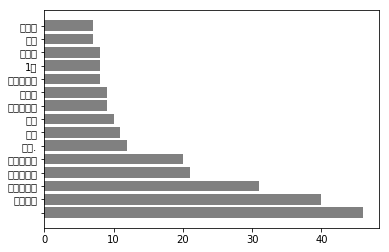

In [90]:
# 아웃풋으로 확인하려면 써야한다. 쓰지않으면 창이 뜬다.
% matplotlib inline
import matplotlib.pyplot as plt

count = map(lambda x: x[0], wc3)
word = map(lambda x: x[1], wc3)
plt.barh(range(len(count)), count, color = 'grey')
plt.yticks(range(len(count)), word)
plt.show()

### combineByKey

In [91]:
marks = spark.sparkContext.parallelize([('kim',86),('lim',87),('kim',75),
                                      ('kim',91),('lim',78),('lim',92),
                                      ('lim',79),('lee',99)])

In [92]:
marksByKey = marks.combineByKey(lambda value: (value,1),
                             lambda x,value: (x[0]+value, x[1]+1),
                             lambda x,y: (x[0]+y[0], x[1]+y[1]))

In [93]:
marksByKey.collect()

[('kim', (252, 3)), ('lim', (336, 4)), ('lee', (99, 1))]

In [94]:
heights = spark.sparkContext.parallelize([
        ('M',182.),('F',164.),('M',180.),('M',185.),('M',171.),('F',162.)
    ])

In [95]:
heightsByKey = heights.combineByKey(lambda value: (value,1),
                             lambda x,value: (x[0]+value, x[1]+1),
                             lambda x,y: (x[0]+y[0], x[1]+y[1]))

In [96]:
heightsByKey.collect()

[('M', (718.0, 4)), ('F', (326.0, 2))]

In [97]:
avgByKey = heightsByKey.map(lambda (label,(valSum,count)):
                                (label,valSum/count))

print avgByKey.collectAsMap()

{'M': 179.5, 'F': 163.0}


s.7 spark-submit

In [101]:
%%writefile src/ds_spark_rdd_hello.py
# -*- coding: UTF-8 -*-
import pyspark
def doIt():
    print "---------RESULT-----------"
    print spark.version
    spark.conf.set("spark.logConf","false")
    rdd=spark.sparkContext.parallelize(range(1000), 10)
    print "mean=",rdd.mean()
    nums = spark.sparkContext.parallelize([1, 2, 3, 4])
    squared = nums.map(lambda x: x * x).collect()
    for num in squared:
        print "%i " % (num)

if __name__ == "__main__":
    myConf=pyspark.SparkConf()
    spark = pyspark.sql.SparkSession.builder\
        .master("local")\
        .appName("myApp")\
        .config(conf=myConf)\
        .getOrCreate()
    doIt()
    spark.stop()

Overwriting src/ds_spark_rdd_hello.py
